# 비지도 학습 예제 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('dataset/winequality-red.csv')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
features = data.drop(columns=['quality'])

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [9]:
cluster_means = data.groupby('Cluster').mean()
print("클러스터별 평균값:")
print(cluster_means)

cluster_quality = data.groupby('Cluster')['quality'].mean()
print("클러스터별 품질 점수 평균:")
print(cluster_quality)

클러스터별 평균값:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2        3.284267   0.626533   9.883156

In [10]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

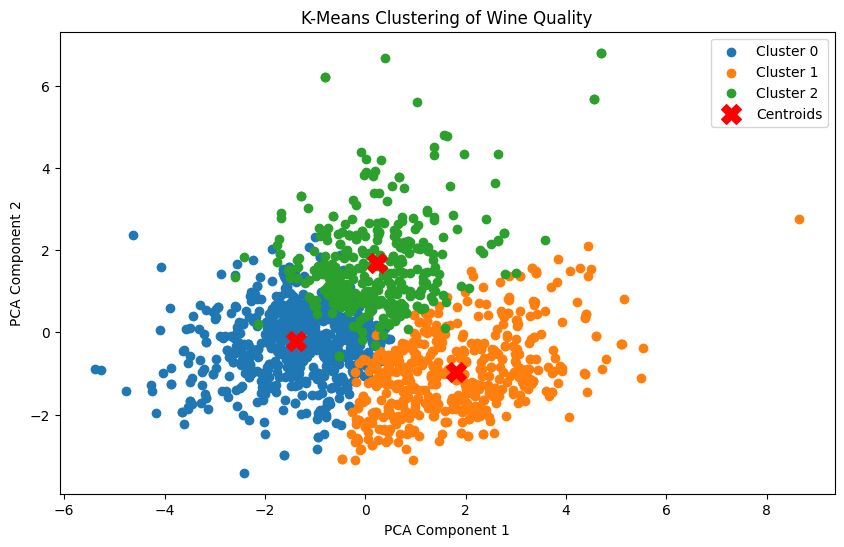

In [11]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = pca_features[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
pca_centroids = pca.transform(centroids)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering of Wine Quality')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [12]:
# 각 클러스터별 기초 통계 비교
cluster_stats = data.groupby('Cluster').agg({
    'quality': ['mean', 'std', 'min', 'max'],
    'alcohol': ['mean', 'std', 'min', 'max'],
    'volatile acidity': ['mean', 'std', 'min', 'max']
}).reset_index()    
print("\n클러스터별 기초 통계:")
print(cluster_stats)


클러스터별 기초 통계:
  Cluster   quality                      alcohol                       \
               mean       std min max       mean       std  min   max   
0       0  5.552632  0.802648   3   8  10.494044  1.088952  9.0  14.0   
1       1  5.960159  0.846742   3   8  10.724037  1.083720  8.4  14.9   
2       2  5.362667  0.595611   4   8   9.883156  0.754609  8.5  12.9   

  volatile acidity                        
              mean       std   min   max  
0         0.609342  0.171471  0.16  1.58  
1         0.405080  0.126141  0.12  0.89  
2         0.535173  0.160909  0.18  1.24  
